In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [341]:
dataframe = pd.read_csv('Data/classification_2.csv')

In [342]:
dataframe = dataframe.head(1500)

In [343]:
dataframe.nunique()

39                  67
 State-gov           7
 77516            1465
 Bachelors          16
 13                 16
 Never-married       7
 Adm-clerical       15
 Not-in-family       6
 White               5
 Male                2
 2174               43
 0                  35
 40                 64
 United-States      32
 <=50K               2
dtype: int64

In [344]:
# as there were spaces in the cloumn names we had to remove the spaces form the column names
dataframe.columns = dataframe.columns.str.strip()

In [345]:
dataframe = dataframe.drop(['State-gov', 'Bachelors','Adm-clerical', 'Not-in-family', 'White', 'United-States', 'Male'], axis=1)

In [346]:
new_columns = {'<=50K':'y'}
dataframe.rename(columns=new_columns, inplace=True)

In [347]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
39               1500 non-null int64
77516            1500 non-null int64
13               1500 non-null int64
Never-married    1500 non-null object
2174             1500 non-null int64
0                1500 non-null int64
40               1500 non-null int64
y                1500 non-null object
dtypes: int64(6), object(2)
memory usage: 93.8+ KB


In [348]:
dataframe.y = dataframe.y.str.strip()

In [349]:
(dataframe.isna()).sum()

39               0
77516            0
13               0
Never-married    0
2174             0
0                0
40               0
y                0
dtype: int64

In [350]:
dataframe.head()

,39,77516,13,Never-married,2174,0,40,y
0,50,83311,13,Married-civ-spouse,0,0,13,<=50K
1,38,215646,9,Divorced,0,0,40,<=50K
2,53,234721,7,Married-civ-spouse,0,0,40,<=50K
3,28,338409,13,Married-civ-spouse,0,0,40,<=50K
4,37,284582,14,Married-civ-spouse,0,0,40,<=50K


In [351]:
dataframe = pd.concat((dataframe, pd.get_dummies(dataframe['Never-married'])),1)
column=['Never-married']
dataframe = dataframe.drop(column,axis=1)

In [352]:
dataframe.head()

,39,77516,13,2174,0,40,y,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,50,83311,13,0,0,13,<=50K,0,0,1,0,0,0,0
1,38,215646,9,0,0,40,<=50K,1,0,0,0,0,0,0
2,53,234721,7,0,0,40,<=50K,0,0,1,0,0,0,0
3,28,338409,13,0,0,40,<=50K,0,0,1,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,1,0,0,0,0


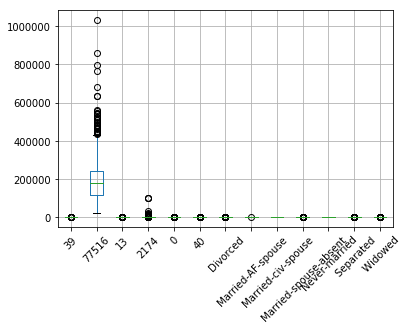

In [353]:
dataframe.boxplot(rot=45)

In [354]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
39                        1500 non-null int64
77516                     1500 non-null int64
13                        1500 non-null int64
2174                      1500 non-null int64
0                         1500 non-null int64
40                        1500 non-null int64
y                         1500 non-null object
 Divorced                 1500 non-null uint8
 Married-AF-spouse        1500 non-null uint8
 Married-civ-spouse       1500 non-null uint8
 Married-spouse-absent    1500 non-null uint8
 Never-married            1500 non-null uint8
 Separated                1500 non-null uint8
 Widowed                  1500 non-null uint8
dtypes: int64(6), object(1), uint8(7)
memory usage: 92.4+ KB


In [355]:
def feature_scaling(dataframe,column):
    dataframe[column] = np.divide(np.subtract(dataframe[column],dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

In [356]:
column = ['77516','2174','13','39','40','0']
for item in column:
    dataframe[item] = dataframe[item].astype(float)
for item in column:
    dataframe[item] = feature_scaling(dataframe,item)

In [357]:
dataframe.head()

,39,77516,13,2174,0,40,y,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0.844325,-1.012325,1.152291,-0.151273,-0.232798,-2.252985,<=50K,0,0,1,0,0,0,0
1,-0.055222,0.219254,-0.457054,-0.151273,-0.232798,-0.036073,<=50K,1,0,0,0,0,0,0
2,1.069212,0.396776,-1.261727,-0.151273,-0.232798,-0.036073,<=50K,0,0,1,0,0,0,0
3,-0.804845,1.361751,1.152291,-0.151273,-0.232798,-0.036073,<=50K,0,0,1,0,0,0,0
4,-0.130185,0.860808,1.554628,-0.151273,-0.232798,-0.036073,<=50K,0,0,1,0,0,0,0


In [358]:
def split(dataframe):
    test_data = dataframe.tail(500).reset_index(drop=True)
    # here we reset index as if the index remain same for accessing by index could be difficult
    return dataframe.head(len(dataframe)-500).reset_index(), test_data.reset_index()

In [359]:
# def Eucledian_distance(dataframe,test_data):
    

In [360]:
dataframe.y = dataframe.y.replace({'<=50K': 0, '>50K': 1})
dataframe.head()

,39,77516,13,2174,0,40,y,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0.844325,-1.012325,1.152291,-0.151273,-0.232798,-2.252985,0,0,0,1,0,0,0,0
1,-0.055222,0.219254,-0.457054,-0.151273,-0.232798,-0.036073,0,1,0,0,0,0,0,0
2,1.069212,0.396776,-1.261727,-0.151273,-0.232798,-0.036073,0,0,0,1,0,0,0,0
3,-0.804845,1.361751,1.152291,-0.151273,-0.232798,-0.036073,0,0,0,1,0,0,0,0
4,-0.130185,0.860808,1.554628,-0.151273,-0.232798,-0.036073,0,0,0,1,0,0,0,0


In [361]:
dataframe, test_data = split(dataframe)

In [362]:
class KNN_Algo:
    def KNN_Algo_demo(dataframe,test_data):
        # stores the num rows in test data
        test_size = test_data.shape[0]
        # stores the num rows in dataframe
        data_size = dataframe.shape[0]
        # storing original outputs
        original_outputs = test_data.loc[:,'y']
        # storing the outputs of dataframe
        data_outputs = dataframe['y']
        # deleting the outputs from dataframe for computing
        dataframe = dataframe.drop('y',axis=1)
        #deleting the output rows as we'll be compuing on the basis of other rows
        test_data = test_data.drop('y', axis=1)
        predicted_outputs = pd.Series(np.zeros(test_size))
        Eucledian_dist = pd.DataFrame(columns=['dist','y'])
        k = 5
        for counter1 in range(0,test_size):
            for counter2 in range(0,data_size):
                Eucledian_dist.loc[counter2,'dist'] = np.sum(
                    np.square(
                        np.subtract(
                            test_data.iloc[counter1,:],dataframe.iloc[counter2,:]
                        )
                    )
                )
                Eucledian_dist.loc[counter2,'y'] = data_outputs[counter2]
            Eucledian_dist.dist = np.power(Eucledian_dist.dist,0.5)
            Eucledian_dist = Eucledian_dist.sort_values(by=['dist'])
    #         print(Eucledian_dist.head(),'tail', Eucledian_dist.tail(),'uniques', Eucledian_dist.nunique())
            # If the sum of top k elements are x
            if((Eucledian_dist.y[:k]=='1').sum() >(k/2)):
                predicted_outputs[counter1] = 1
            else:
                predicted_outputs[counter1] = 0
            if(counter1%100 ==0):
                print("iteration : {}, predicted: {}".format(counter1,predicted_outputs[counter1]))
        similars = (original_outputs[:]==predicted_outputs[:]).sum()
        accuracy  = similars/test_size
        print("Accuracy",accuracy*100)

In [363]:
def main(dataframe,test_data):
    KNN_Algo.KNN_Algo_demo(dataframe,test_data)

In [364]:
main(dataframe,test_data)

iteration : 0, predicted: 0.0
iteration : 100, predicted: 0.0
iteration : 200, predicted: 0.0
iteration : 300, predicted: 0.0
iteration : 400, predicted: 0.0
Accuracy 72.0
